In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
from costs import *
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************  
    
    x_test = x[k_indices[k]]    
    y_test = y[k_indices[k]]
    
    index_not_k = np.array([i for i in range(len(x)) if i not in k_indices[k]])
    
    x_train = x[index_not_k]
    y_train = y[index_not_k]
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    
    tx_train = build_poly(x_train, degree)
    tx_test = build_poly(x_test, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    
    w_star = ridge_regression(y_train, tx_train, lambda_)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************

    loss_tr = compute_rmse(y_train, tx_train, w_star)
    loss_te = compute_rmse(y_test, tx_test, w_star)
    #print(loss_tr)
    
    return loss_tr, loss_te

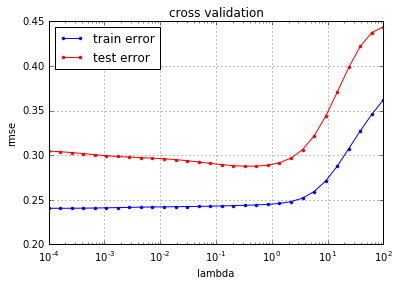

In [5]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for lamb in lambdas:
        loss_tr = 0
        loss_te = 0
        for k in range(len(k_indices)):
            ltr, lte = cross_validation(y, x, k_indices, k, lamb, degree)
            loss_tr = loss_tr + ltr/len(k_indices)
            loss_te = loss_te + lte/len(k_indices)
        mse_tr.append(loss_tr)
        mse_te.append(loss_te)
            
    cross_validation_visualization(lambdas, mse_tr, mse_te)
    
    return lambdas, mse_tr, mse_te

lambdas, mse_tr, mse_te = cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

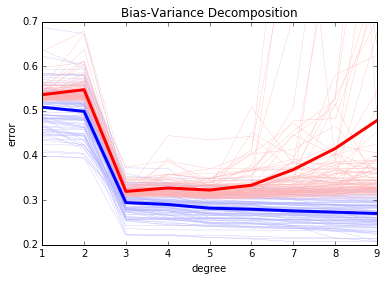

In [6]:
from least_squares import least_squares
from split_data import *
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
        
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed=seed)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        
        for index_degree, degree in enumerate(degrees):
            # ***************************************************
            # INSERT YOUR CODE HERE
            # form data with polynomial degree: TODO
            # ***************************************************

            tx_train = build_poly(x_train, degree)
            tx_test = build_poly(x_test, degree)

            # ***************************************************
            # INSERT YOUR CODE HERE
            # ridge regression: TODO
            # ***************************************************

            w_star = least_squares(y_train, tx_train)

            # ***************************************************
            # INSERT YOUR CODE HERE
            # calculate the loss for train and test data: TODO
            # ***************************************************

            rmse_tr[index_seed, index_degree] = compute_rmse(y_train, tx_train, w_star)
            rmse_te[index_seed, index_degree] = compute_rmse(y_test, tx_test, w_star)                    

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()